In [3]:
import pandas as pd
import numpy as np

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Importing models from Sickit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# Importing metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# Importing additional tools
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [4]:
df = pd.read_csv("diabetes.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [ ]:
# Checking the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
# Data Preprocessing

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_new = df
# 1) replace 0 by null on each of these columns
df_new[["Glucose",
        "BloodPressure",
        "SkinThickness",
        "Insulin",
        "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [ ]:
df_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
 # As you see, there are a lot of missing values
#We are fixing this by filling the null valus with the mean so we can have more of a reliable data
df_new["Glucose"].fillna(df_new["Glucose"].mean(), inplace = True)
df_new["BloodPressure"].fillna(df_new["BloodPressure"].mean(), inplace = True)
df_new["SkinThickness"].fillna(df_new["SkinThickness"].mean(), inplace = True)
df_new["Insulin"].fillna(df_new["Insulin"].mean(), inplace = True)
df_new["BMI"].fillna(df_new["BMI"].mean(), inplace = True)

In [ ]:
#let's check again! count of Nan
df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_new["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
# Get numeric columns
numeric_cols = df_new.select_dtypes(include=['float', 'int']).columns
print("Numeric Columns:", numeric_cols)

# Get categorical columns
categorical_cols = df_new.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


Outcome
0    500
1    268
Name: count, dtype: int64
Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64


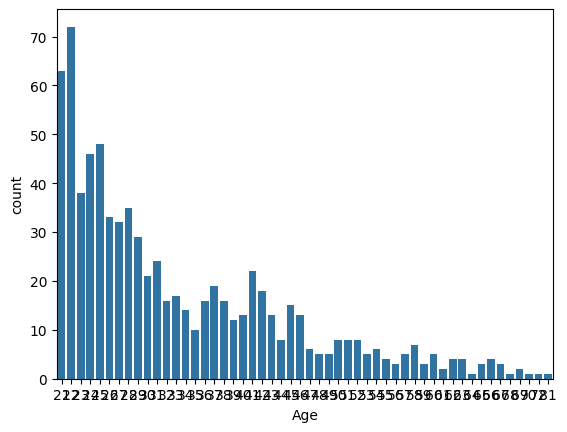

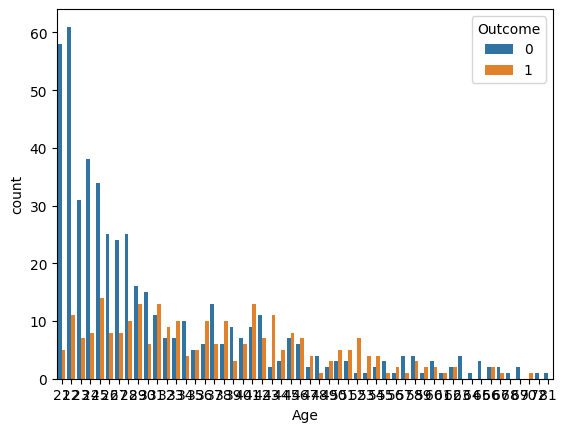

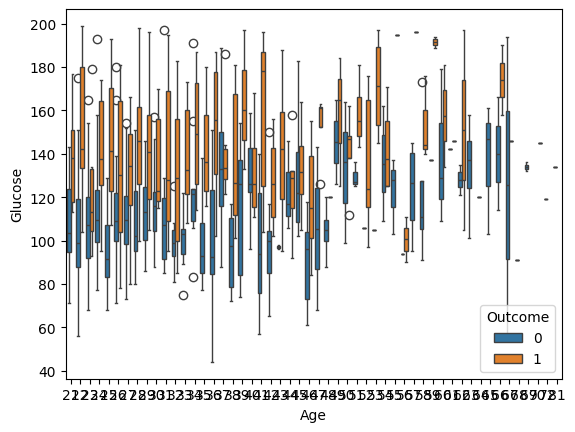

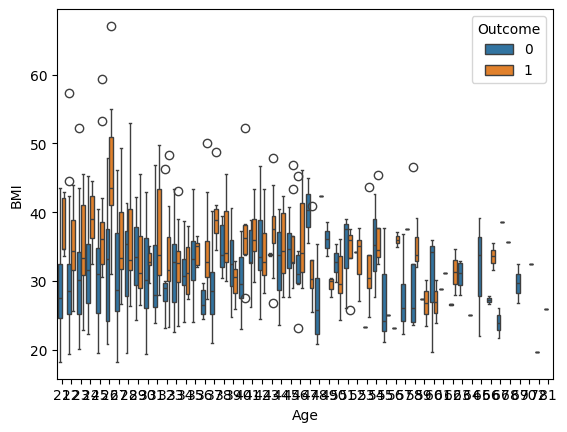

In [ ]:
# categorical variables analysis
print(df_new['Outcome'].value_counts())
print(df_new['Age'].value_counts())
sns.countplot(x='Age', data=df_new)
plt.show()
sns.countplot(x='Age', hue='Outcome', data=df_new)
plt.show()
pd.crosstab(df_new['Age'], df_new['Outcome'])
sns.boxplot(x='Age', y='Glucose', hue='Outcome', data=df_new)
plt.show()
sns.boxplot(x='Age', y='BMI', hue='Outcome', data=df_new)
plt.show()

Numeric Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000

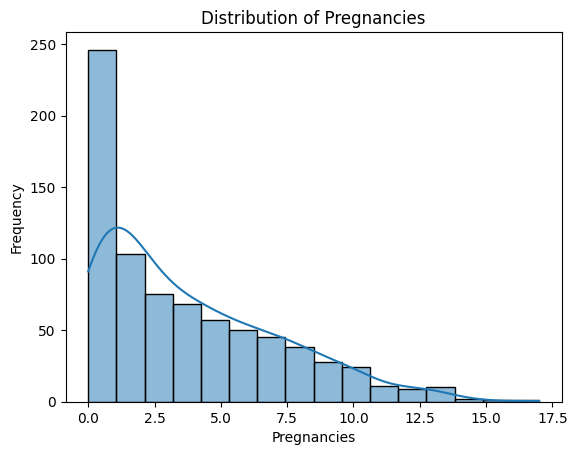

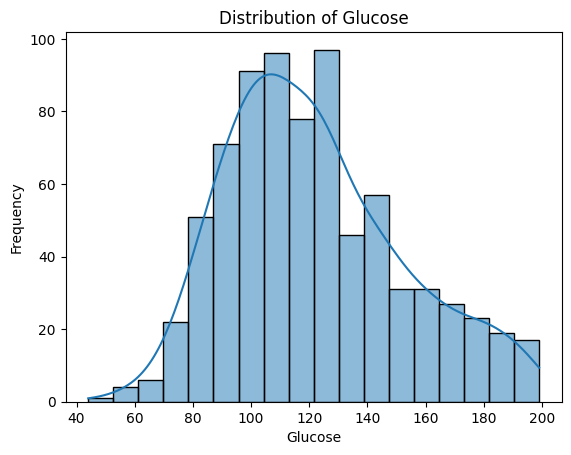

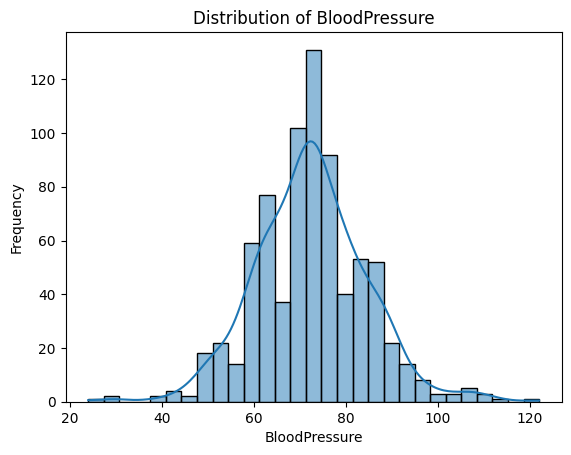

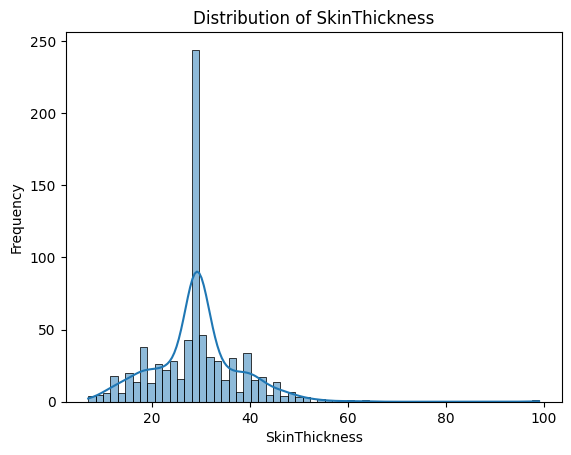

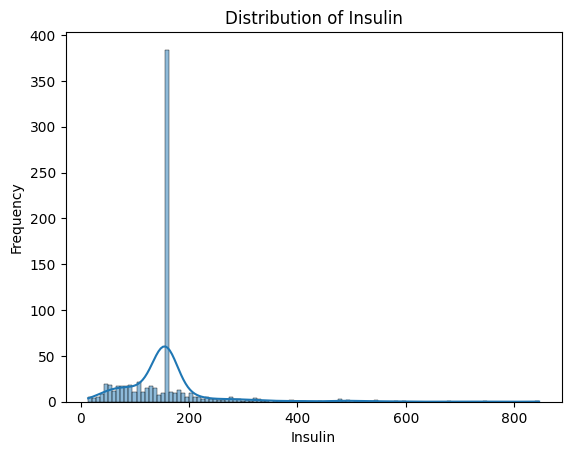

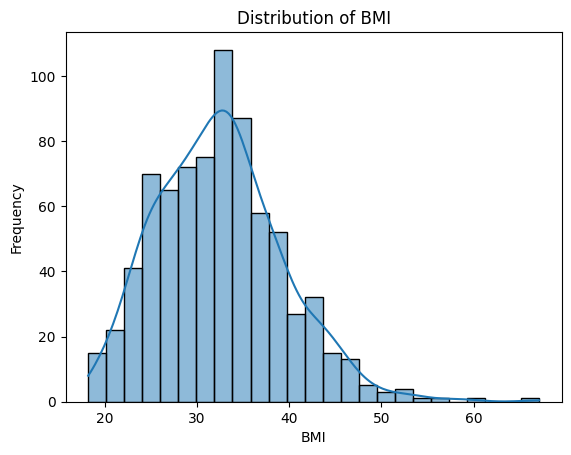

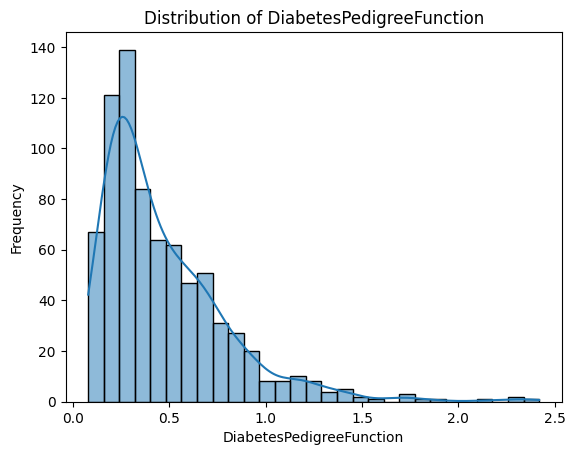

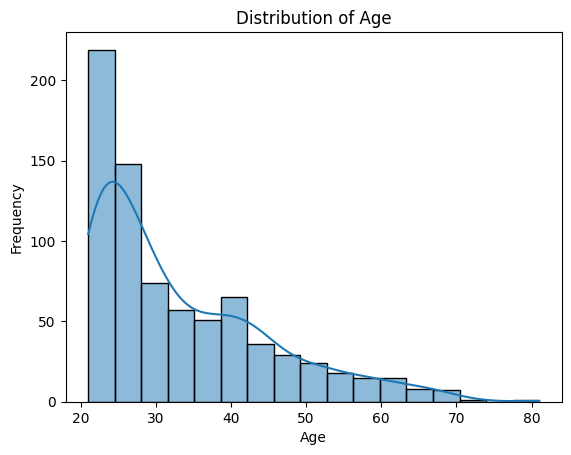

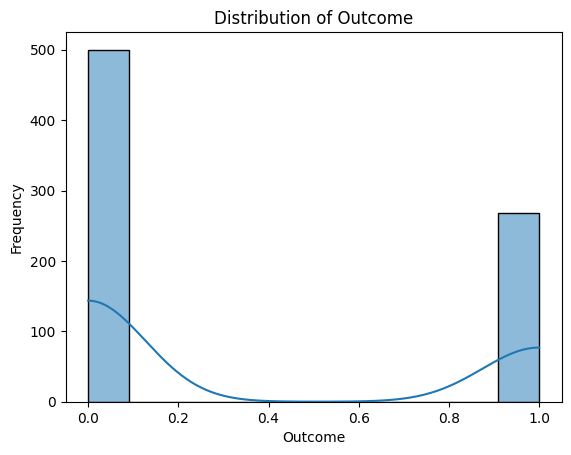

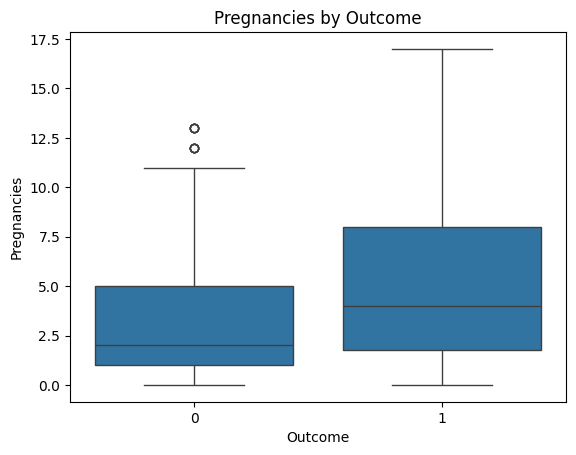

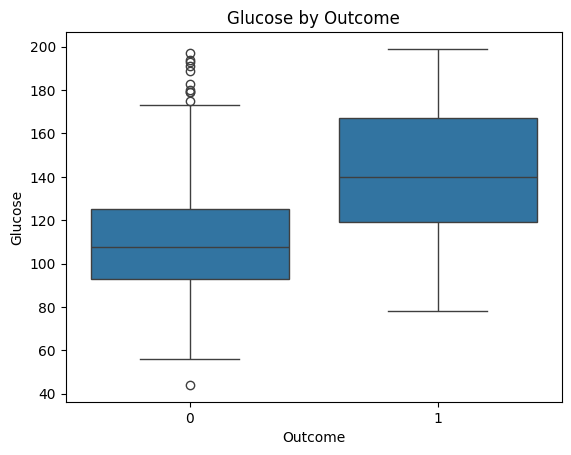

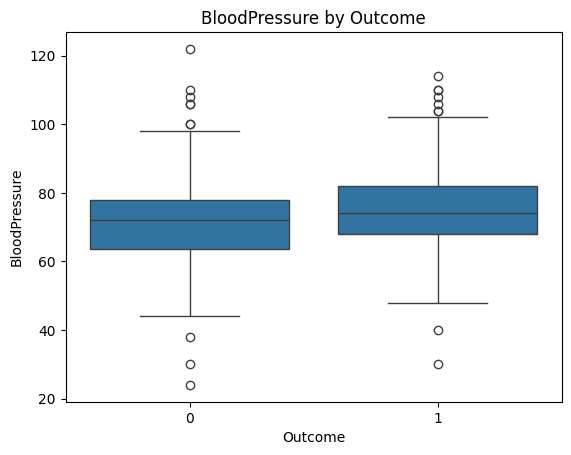

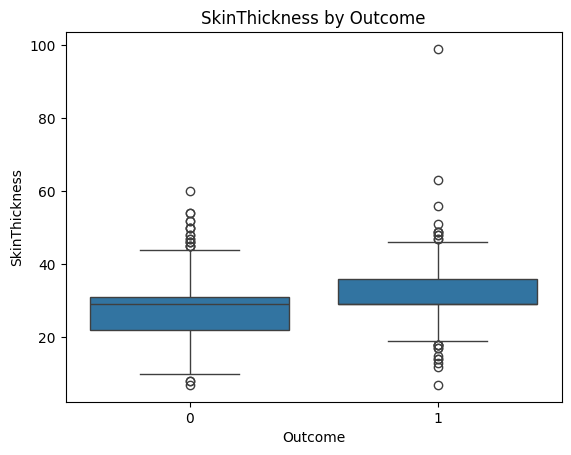

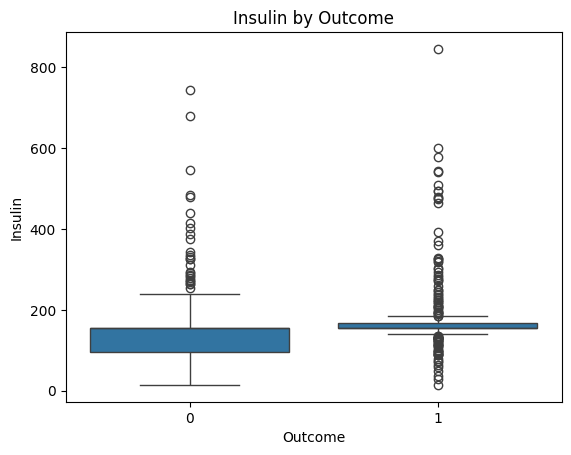

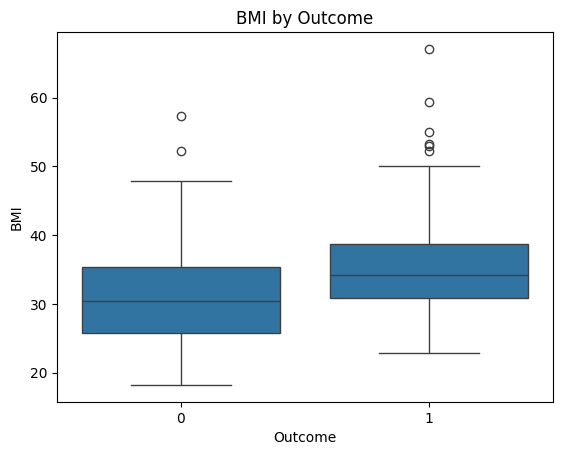

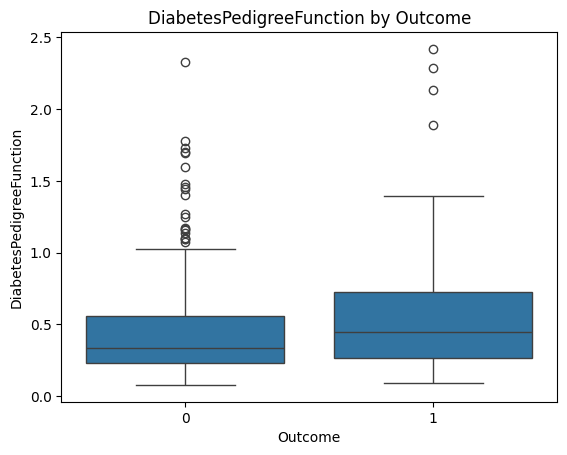

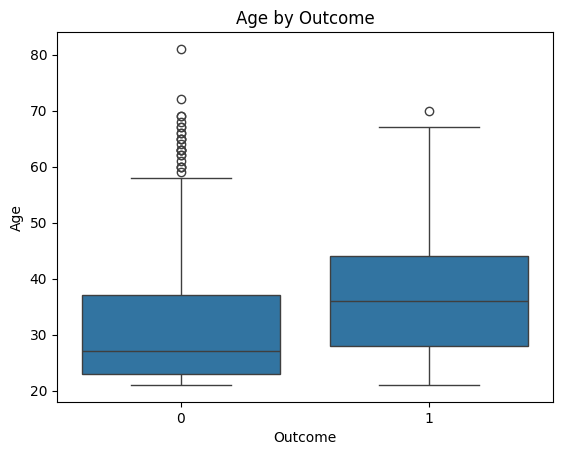

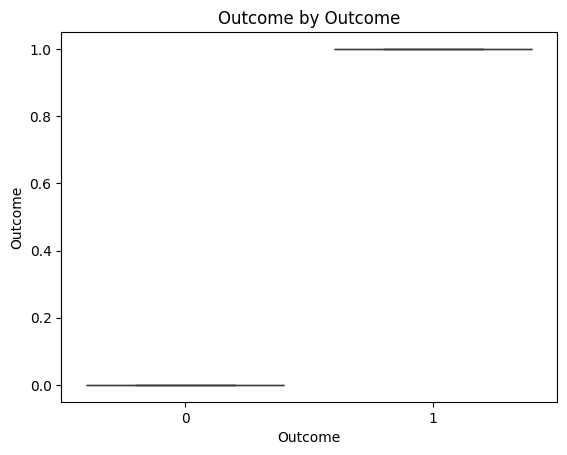

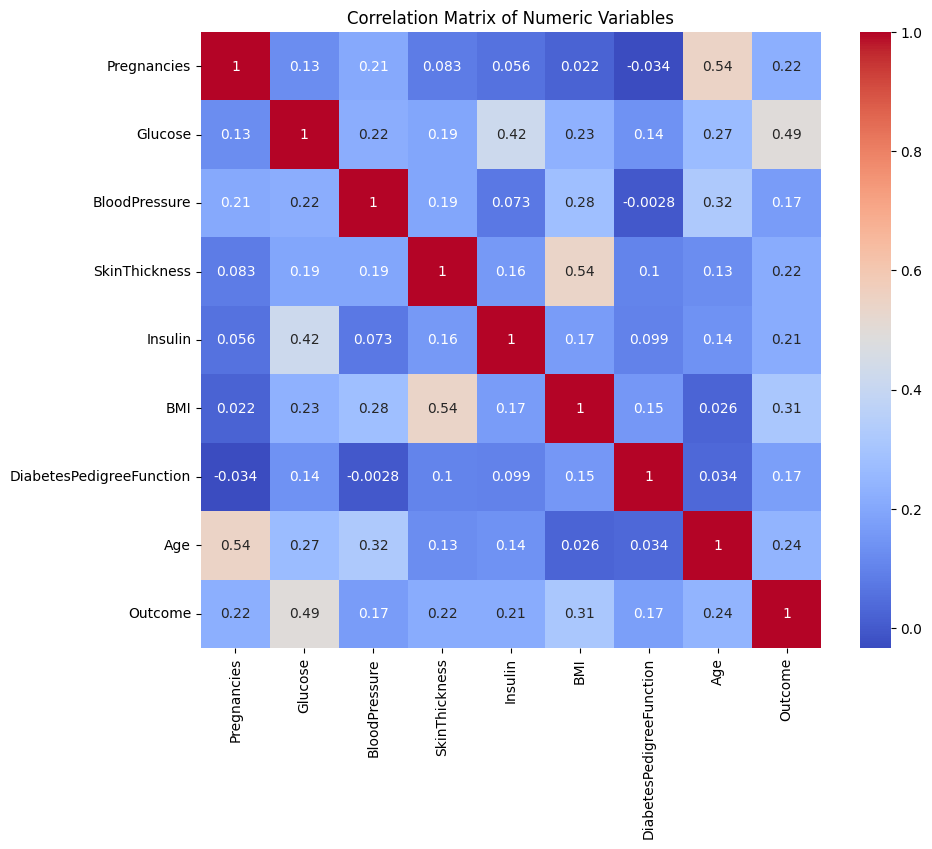

In [ ]:
# Numerical variables analys

# Get numeric columns
numeric_cols = df_new.select_dtypes(include=['float', 'int']).columns
print("Numeric Columns:", numeric_cols)

# Descriptive statistics
print(df_new[numeric_cols].describe())

# Histograms for each numeric variable
for col in numeric_cols:
    plt.figure()  # Create a new figure for each plot
    sns.histplot(df_new[col], kde=True)  # Plot histogram with kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for each numeric variable against the outcome
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x='Outcome', y=col, data=df_new)
    plt.title(f'{col} by Outcome')
    plt.show()

# Correlation matrix
corr_matrix = df_new[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

Descriptive Statistics for Pregnancies by Outcome:
         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0        500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1        268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0


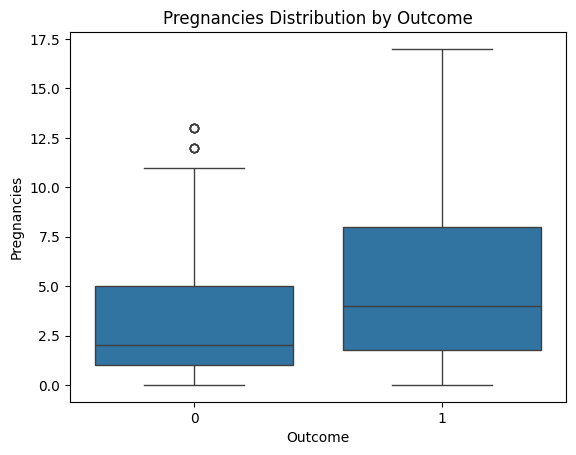

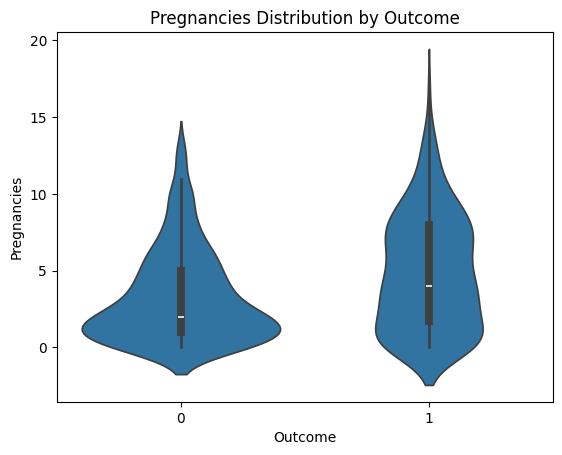

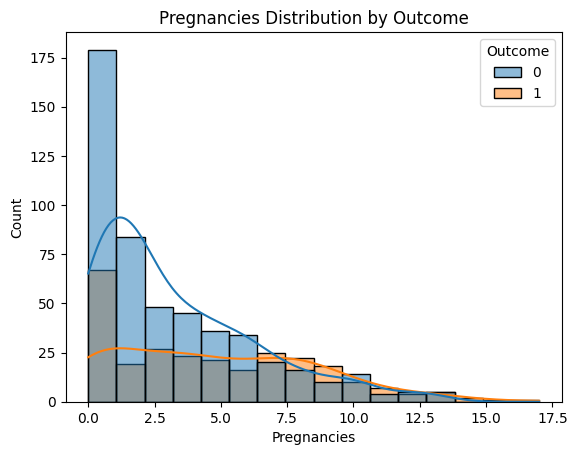

T-test for Pregnancies: t-statistic = -6.30, p-value = 0.000
------------------------------
Descriptive Statistics for Glucose by Outcome:
         count        mean       std   min    25%    50%    75%    max
Outcome                                                               
0        500.0  110.710121  24.71706  44.0   93.0  107.5  125.0  197.0
1        268.0  142.165573  29.54175  78.0  119.0  140.0  167.0  199.0


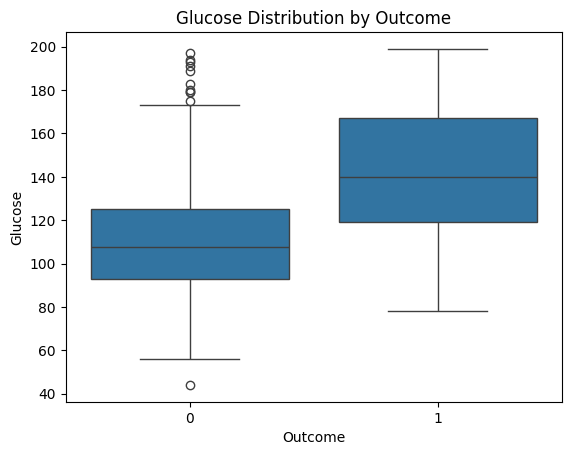

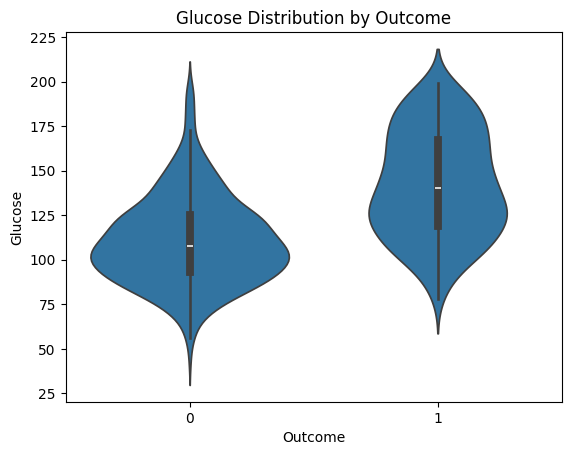

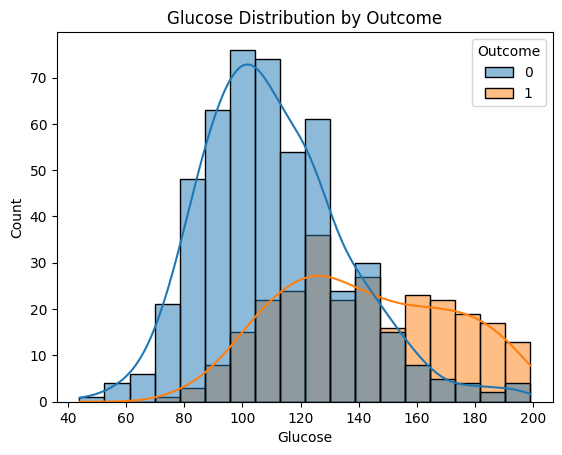

T-test for Glucose: t-statistic = -15.68, p-value = 0.000
------------------------------
Descriptive Statistics for BloodPressure by Outcome:
         count       mean        std   min   25%   50%   75%    max
Outcome                                                            
0        500.0  70.935397  11.931033  24.0  63.5  72.0  78.0  122.0
1        268.0  75.147324  11.945712  30.0  68.0  74.0  82.0  114.0


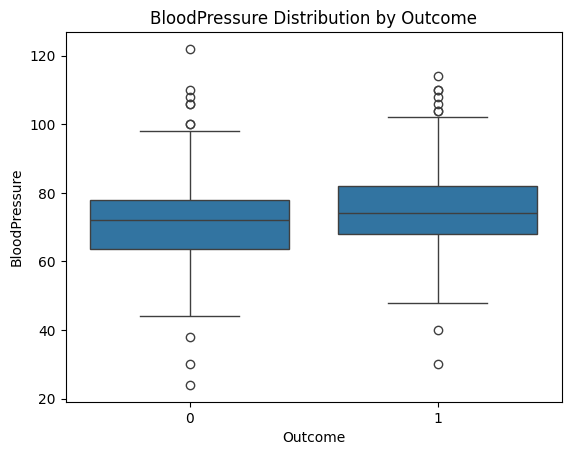

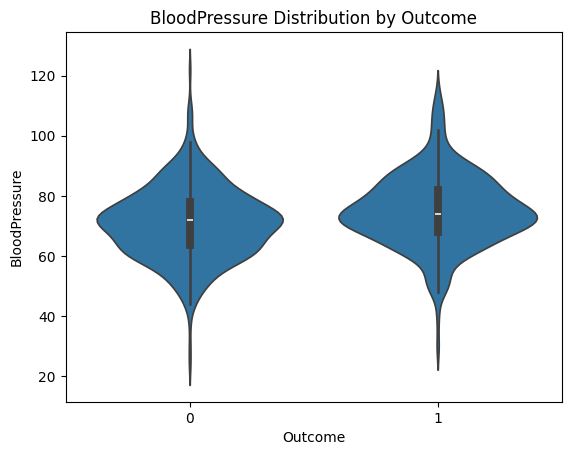

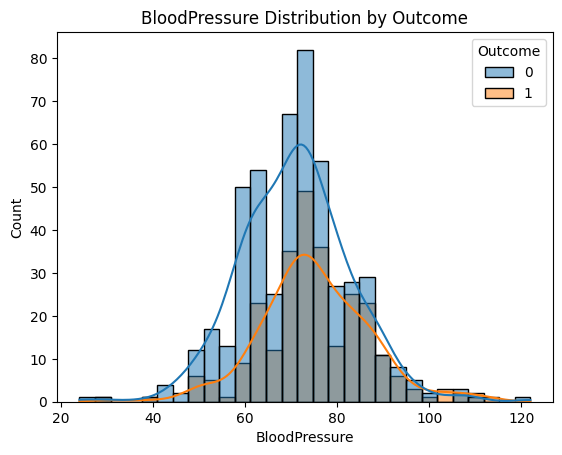

T-test for BloodPressure: t-statistic = -4.66, p-value = 0.000
------------------------------
Descriptive Statistics for SkinThickness by Outcome:
         count       mean       std  min       25%       50%   75%   max
Outcome                                                                 
0        500.0  27.768651  8.559606  7.0  22.00000  29.15342  31.0  60.0
1        268.0  31.736944  8.647599  7.0  29.15342  29.15342  36.0  99.0


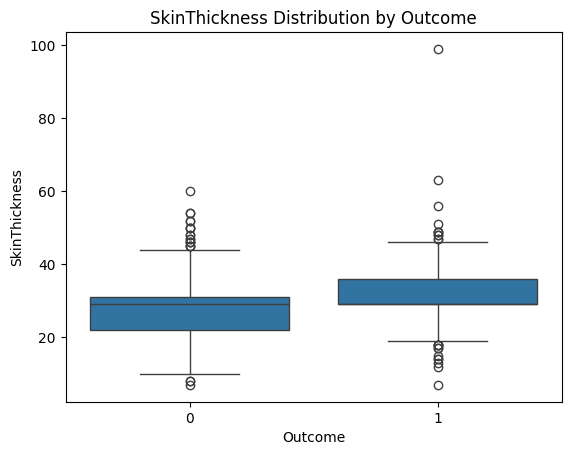

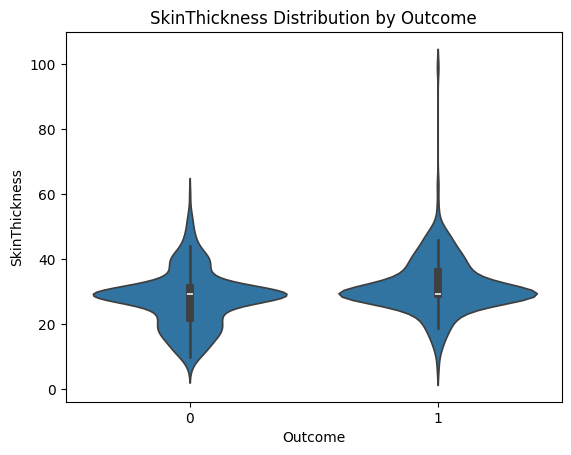

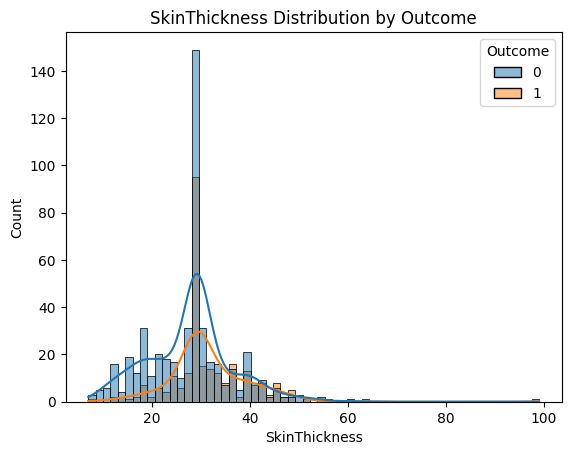

T-test for SkinThickness: t-statistic = -6.10, p-value = 0.000
------------------------------
Descriptive Statistics for Insulin by Outcome:
         count        mean        std   min         25%         50%  \
Outcome                                                               
0        500.0  142.210761  75.463785  15.0   95.000000  155.548223   
1        268.0  180.431548  95.747538  14.0  155.548223  155.548223   

                75%    max  
Outcome                     
0        155.548223  744.0  
1        167.250000  846.0  


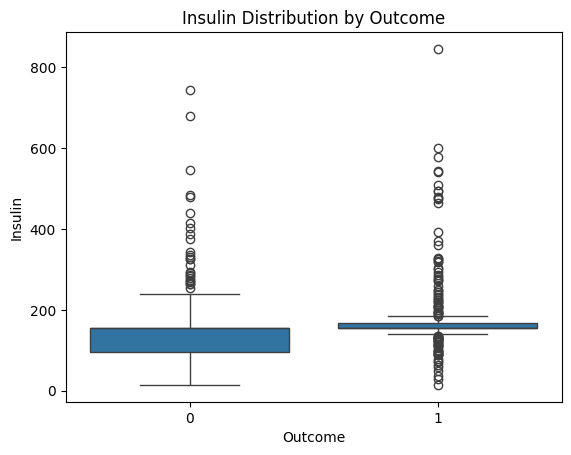

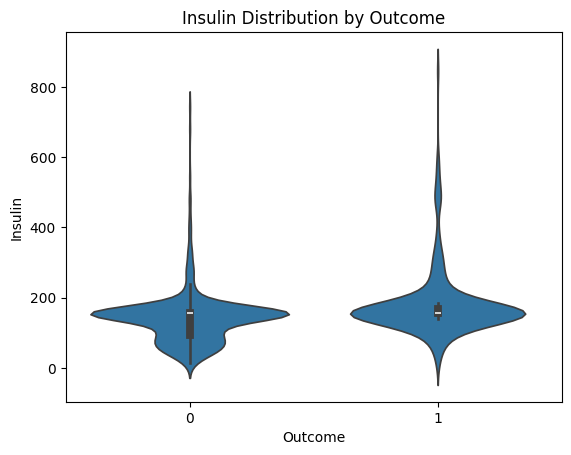

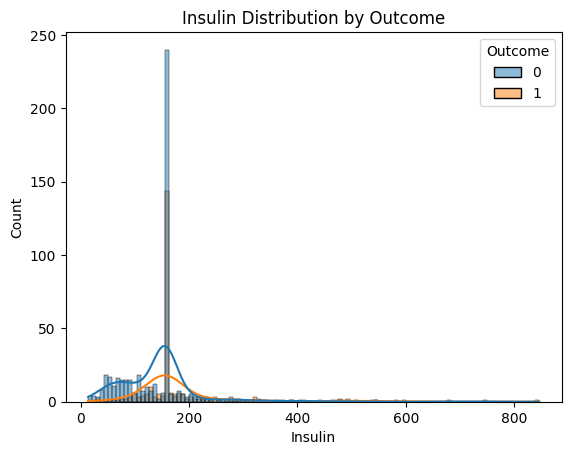

T-test for Insulin: t-statistic = -6.08, p-value = 0.000
------------------------------
Descriptive Statistics for BMI by Outcome:
         count       mean       std   min    25%    50%     75%   max
Outcome                                                              
0        500.0  30.888434  6.504779  18.2  25.75  30.40  35.300  57.3
1        268.0  35.384757  6.595065  22.9  30.90  34.25  38.775  67.1


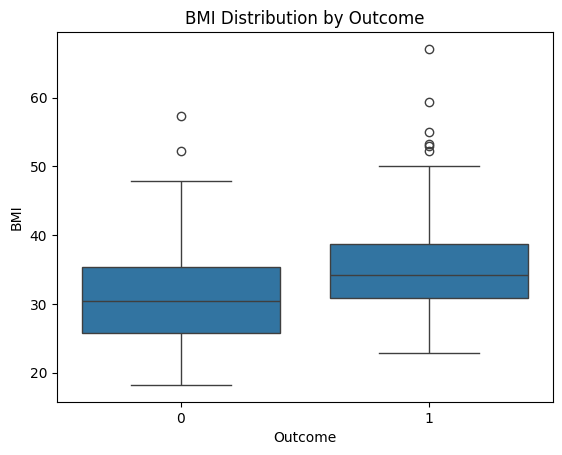

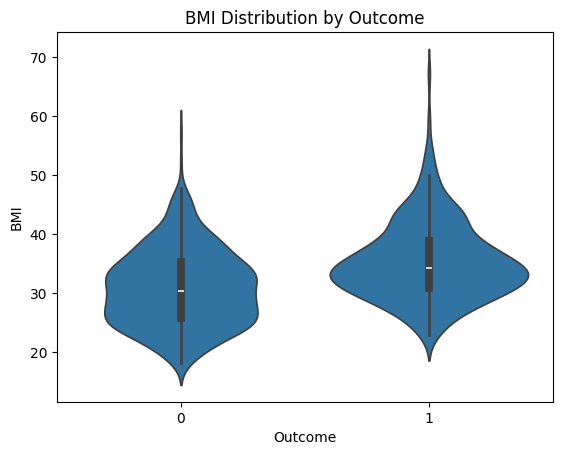

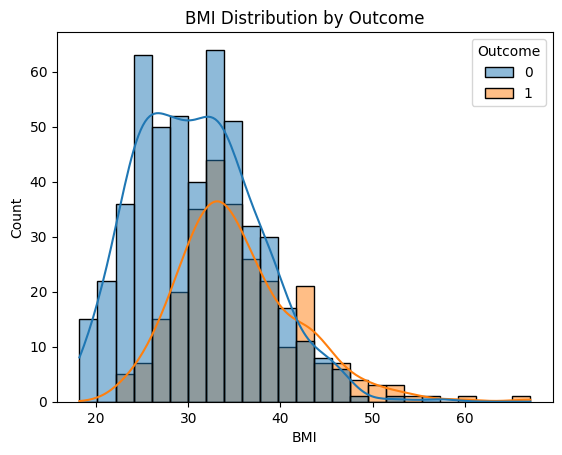

T-test for BMI: t-statistic = -9.09, p-value = 0.000
------------------------------
Descriptive Statistics for DiabetesPedigreeFunction by Outcome:
         count      mean       std    min      25%    50%      75%    max
Outcome                                                                  
0        500.0  0.429734  0.299085  0.078  0.22975  0.336  0.56175  2.329
1        268.0  0.550500  0.372354  0.088  0.26250  0.449  0.72800  2.420


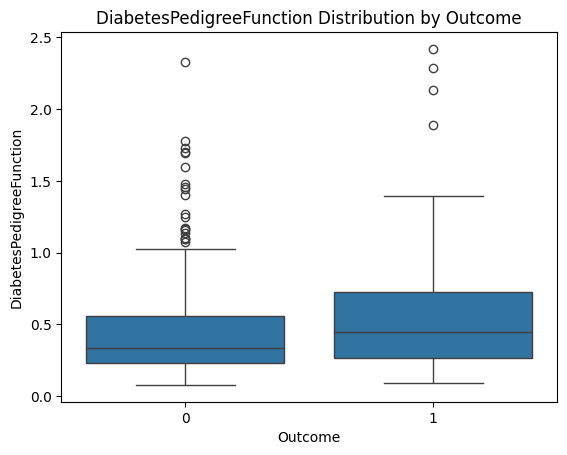

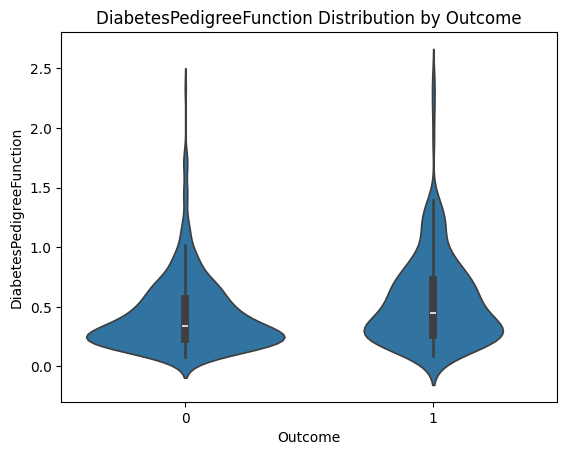

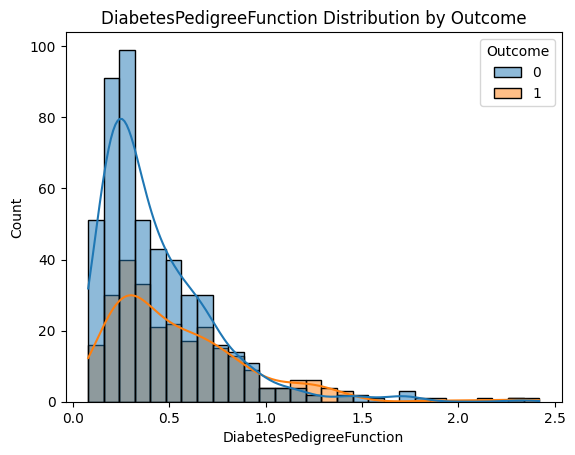

T-test for DiabetesPedigreeFunction: t-statistic = -4.89, p-value = 0.000
------------------------------
Descriptive Statistics for Age by Outcome:
         count       mean        std   min   25%   50%   75%   max
Outcome                                                           
0        500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0
1        268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0


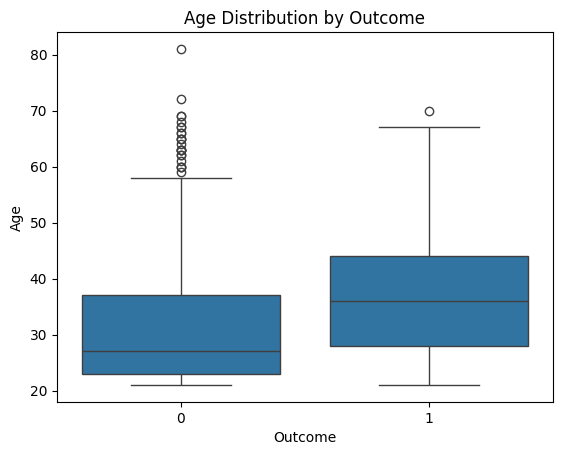

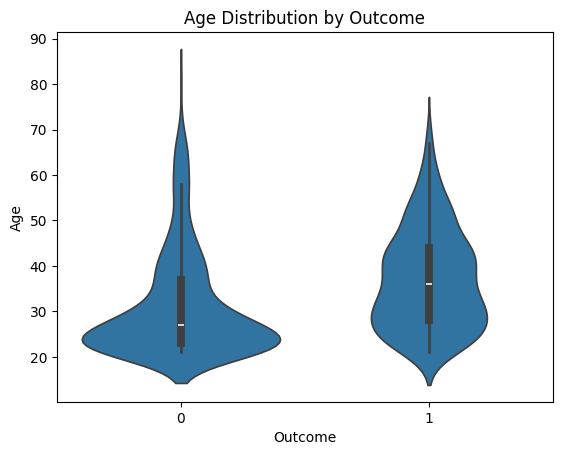

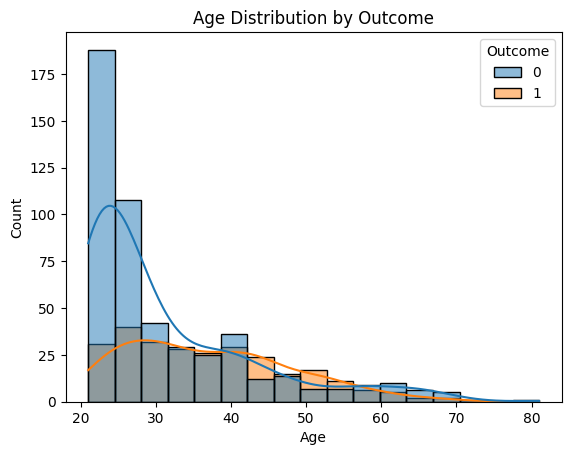

T-test for Age: t-statistic = -6.79, p-value = 0.000
------------------------------
Descriptive Statistics for Outcome by Outcome:
         count  mean  std  min  25%  50%  75%  max
Outcome                                           
0        500.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        268.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0


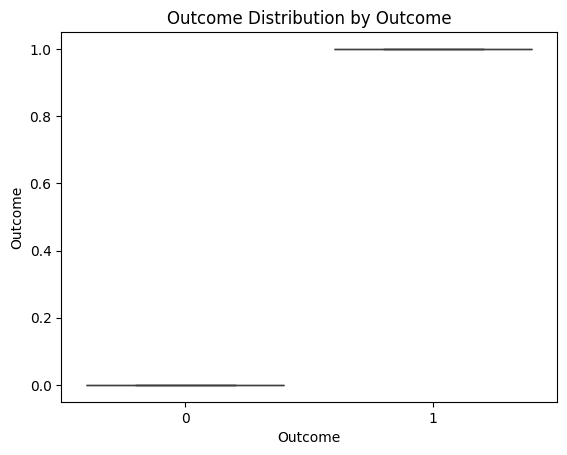

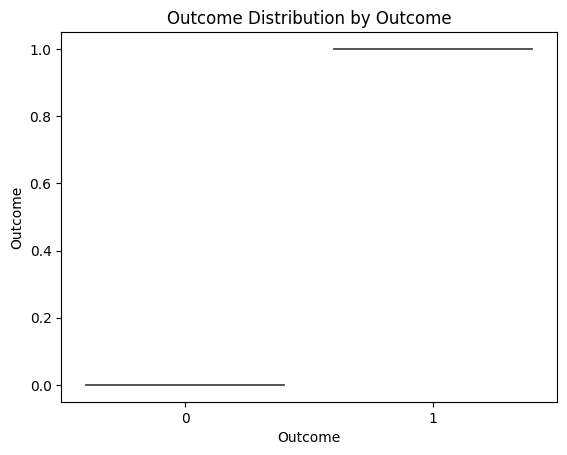

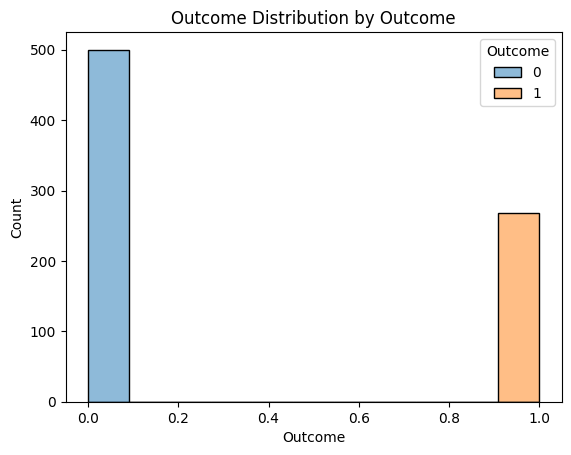

T-test for Outcome: t-statistic = -inf, p-value = 0.000
------------------------------


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Analysis of Numeric Variables by Target


# Assuming 'Outcome' is your target variable
target_variable = 'Outcome'

# Get numeric columns
numeric_cols = df_new.select_dtypes(include=['float', 'int']).columns

# Iterate through numeric columns and analyze by target variable
for col in numeric_cols:
    # Descriptive statistics by target group
    print(f"Descriptive Statistics for {col} by {target_variable}:")
    print(df_new.groupby(target_variable)[col].describe())

    # Box plots
    plt.figure()
    sns.boxplot(x=target_variable, y=col, data=df_new)
    plt.title(f"{col} Distribution by {target_variable}")
    plt.show()

    # Violin plots (show distribution shape)
    plt.figure()
    sns.violinplot(x=target_variable, y=col, data=df_new)
    plt.title(f"{col} Distribution by {target_variable}")
    plt.show()

    # Histograms with KDE by target group
    plt.figure()
    sns.histplot(data=df_new, x=col, hue=target_variable, kde=True)
    plt.title(f"{col} Distribution by {target_variable}")
    plt.show()

    # Statistical tests (example: t-test for comparing means)
    from scipy import stats
    group0 = df_new[df_new[target_variable] == 0][col]
    group1 = df_new[df_new[target_variable] == 1][col]
    t_statistic, p_value = stats.ttest_ind(group0, group1, nan_policy='omit')
    print(f"T-test for {col}: t-statistic = {t_statistic:.2f}, p-value = {p_value:.3f}")
    print("-" * 30)  # Separator between variables

In [ ]:
# Data visualization
 # Our target variable has only two classes: 0 and 1. Here, 0 and 1 represent not having diabetes and having diabetes, respectively.

<ipython-input-19-630b617acea0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', data=df_new, palette=['green', 'black'])


Text(0, 0.5, 'Count')

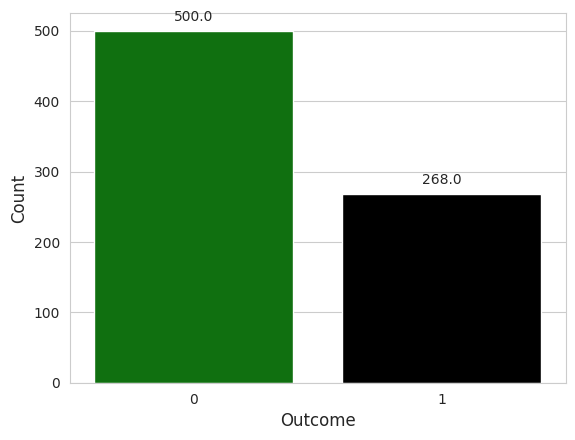

In [ ]:
# create countplot
sns.set_style('whitegrid')
ax = sns.countplot(x='Outcome', data=df_new, palette=['green', 'black'])
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

ax.set_xlabel('Outcome', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

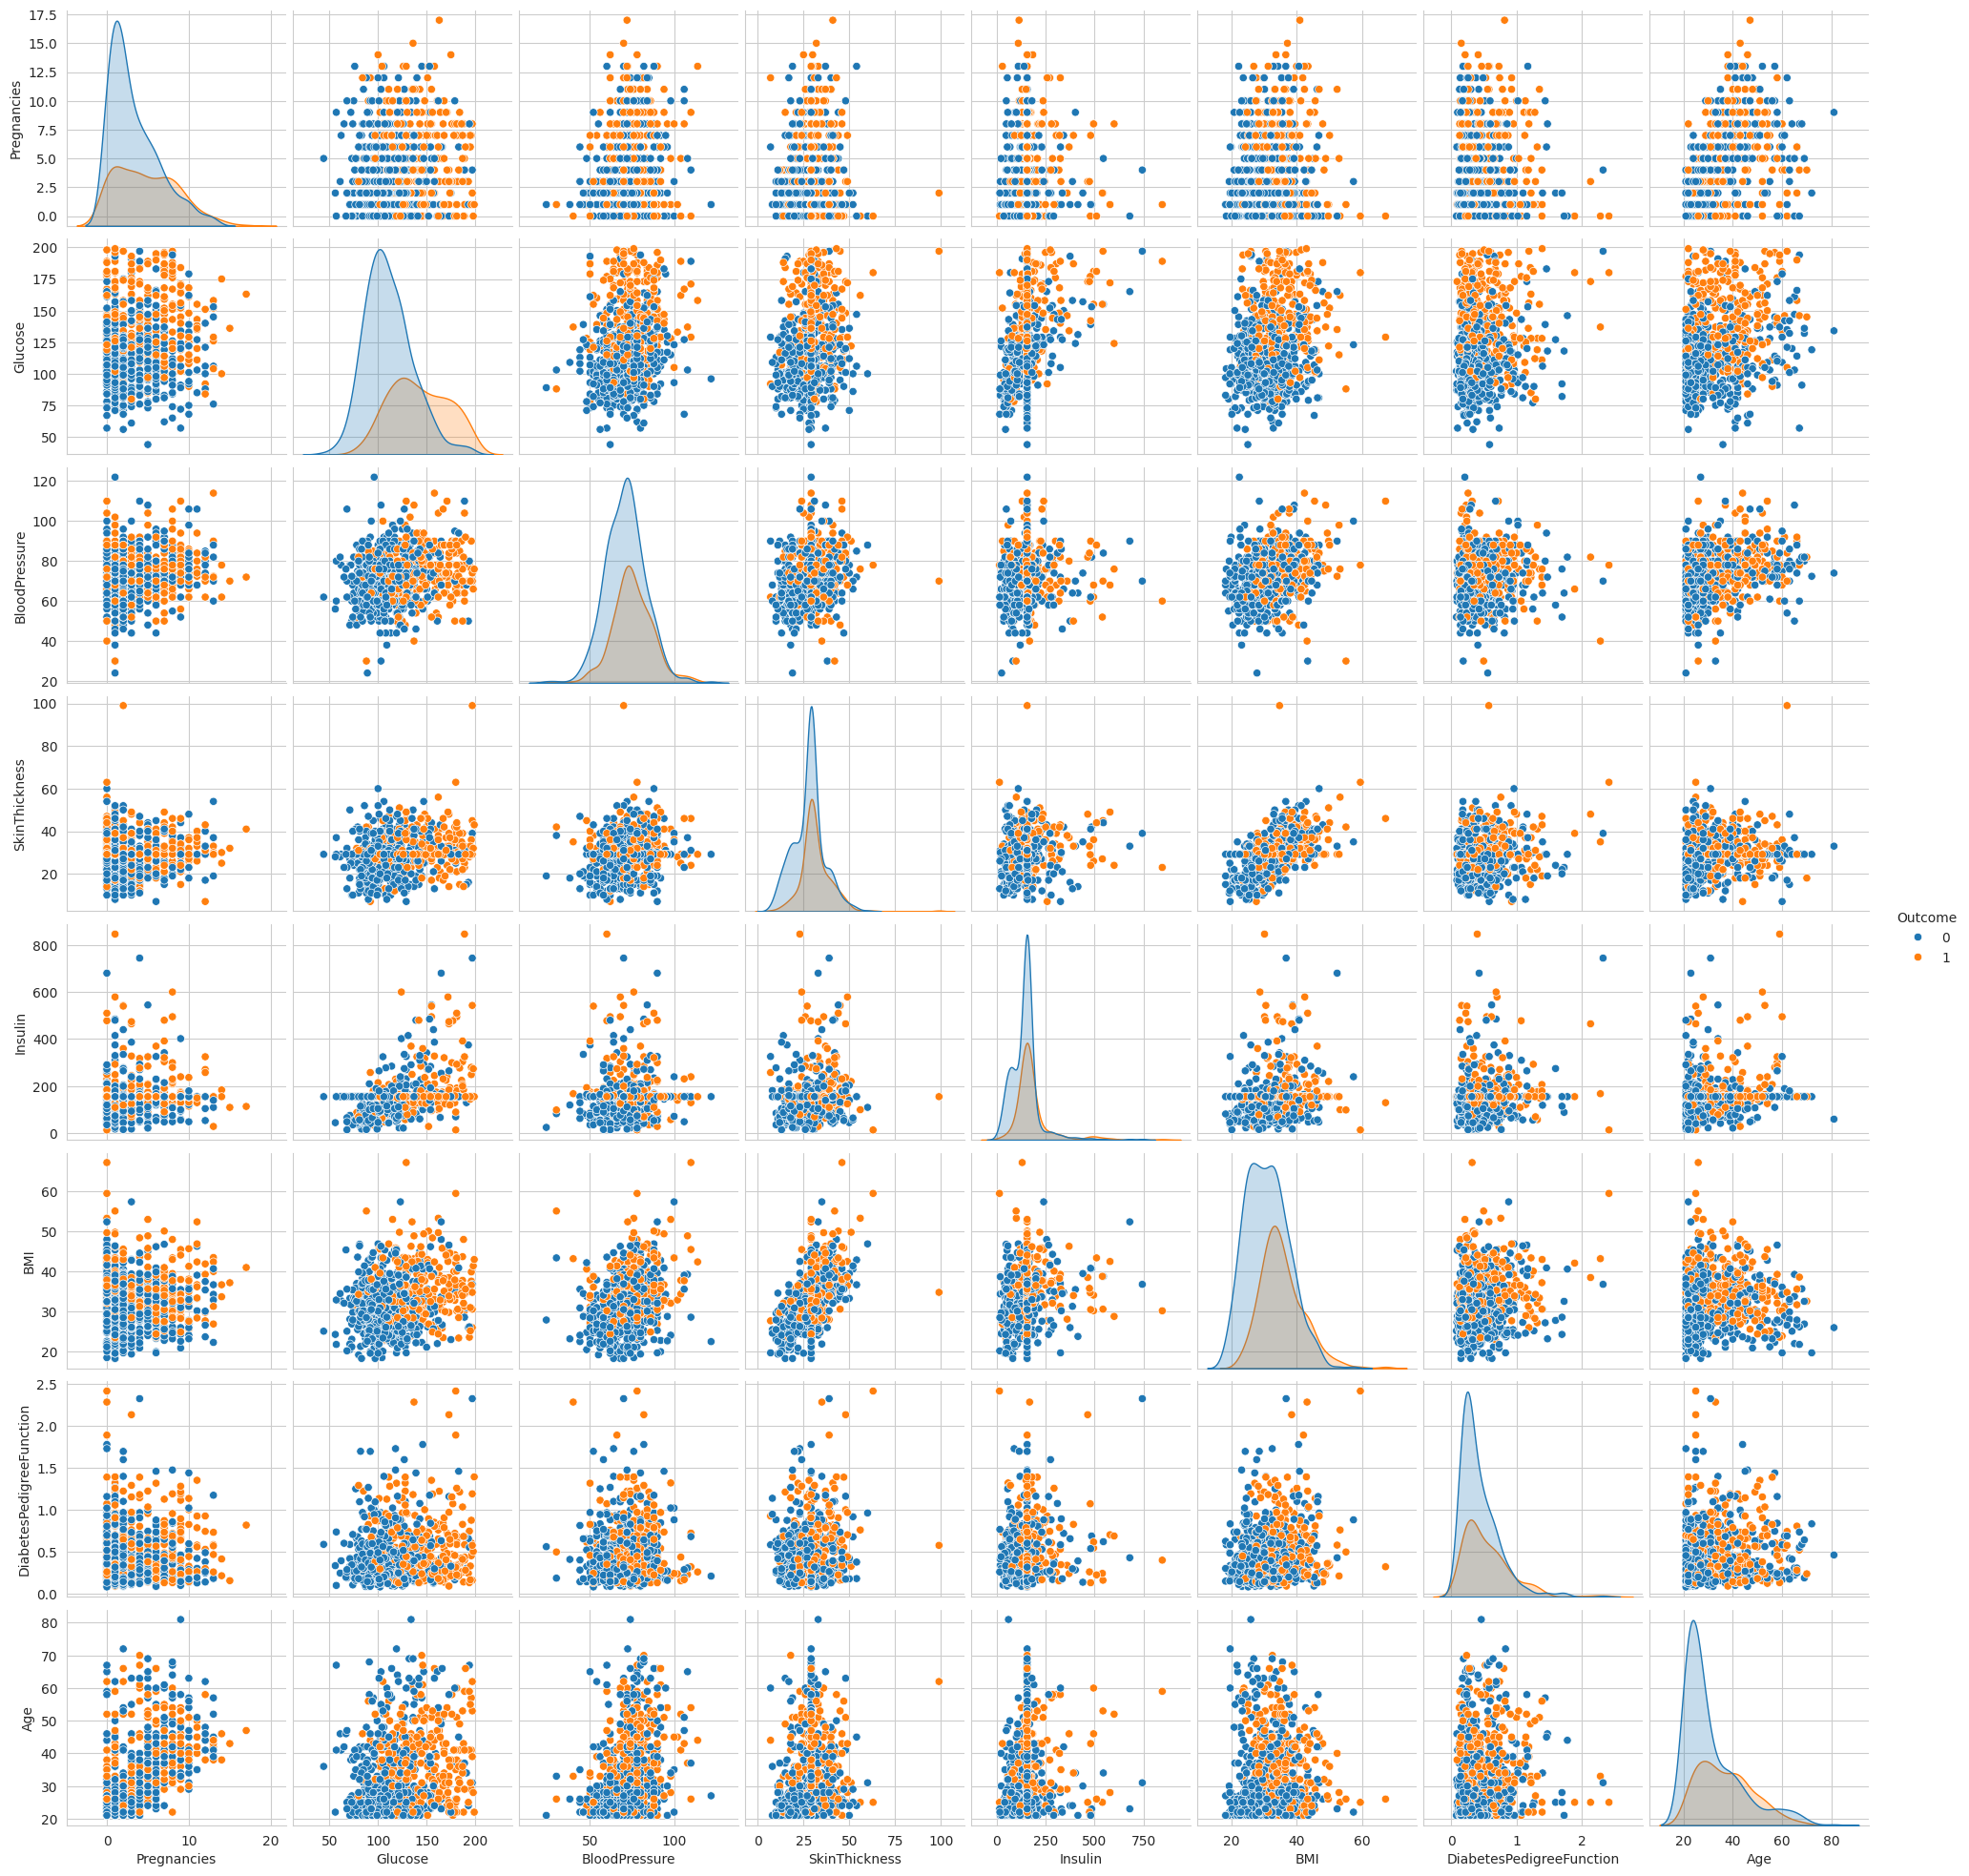

In [ ]:
sns.pairplot(data=df,hue='Outcome')
plt.show()

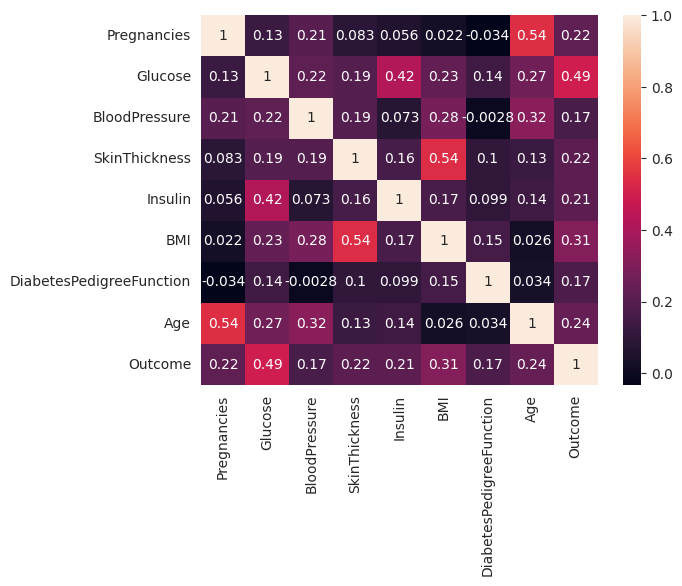

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
# Split data

In [ ]:
y=df_new['Outcome']
X=df_new.drop('Outcome',axis=1)

In [ ]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

print(f"Train dataset's shape: X{X_train.shape}, y{y_train.shape}")
print(f"Test dataset's shape: X{X_test.shape}, y{y_test.shape}")

Train dataset's shape: X(614, 8), y(614,)
Test dataset's shape: X(154, 8), y(154,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df_new['BMI_Age_Ratio'] = df_new['BMI'] / df_new['Age']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

In [ ]:
# Build and evaluate Models
# We will train 5 different models and evaluate each one in addition to some boosting techniques

In [ ]:
# 1) LOGISTIC REGRESSION

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr, recall_lr, f1_lr, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='weighted')
print(classification_report(y_test, y_pred_lr))
# Print the evaluation metrics
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

Accuracy: 0.6948051948051948
Precision: 0.6851423805552246
Recall: 0.6948051948051948
F1 Score: 0.6875038836761325


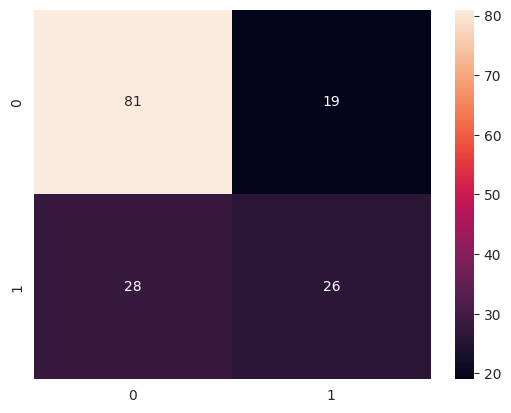

In [ ]:
# plotting counfusion metric for Logistic Regression
lr_cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(lr_cm, annot=True)
plt.show()


In [ ]:
# 2) KNN: K-NEAREST NEIGHBOURS

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn, recall_knn, f1_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
print(classification_report(y_test, y_pred_knn))
# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       100
           1       0.62      0.63      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Accuracy: 0.7337662337662337
Precision: 0.7349337531155714
Recall: 0.7337662337662337
F1 Score: 0.7343185605137567


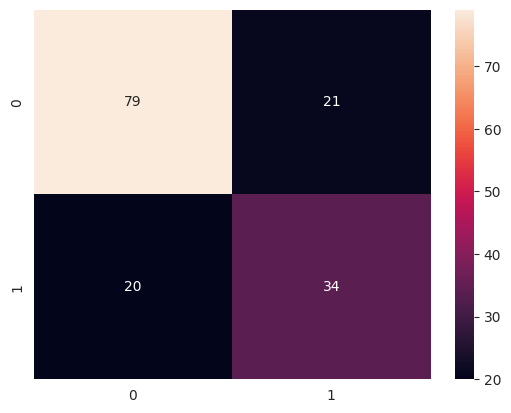

In [ ]:
# plotting counfusion metric for KNN
knn_cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(knn_cm, annot=True)
plt.show()

In [ ]:
# 3) RANDOM FOREST

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_test, y_test)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
print(classification_report(y_test, y_pred_rf))
# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        54

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


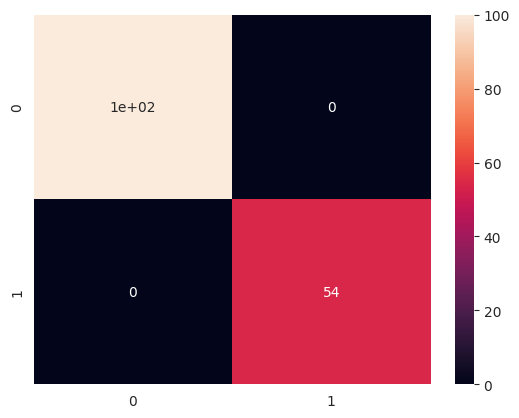

In [ ]:
# plotting counfusion metric for Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm, annot=True)
plt.show()

In [ ]:
# 4) SVM: Support Vector Machine

In [ ]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_test, y_test)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')
print(classification_report(y_test, y_pred_svm))

# Print the evaluation metrics
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154

Accuracy: 0.7272727272727273
Precision: 0.7214837049742711
Recall: 0.7272727272727273
F1 Score: 0.7232230932973366


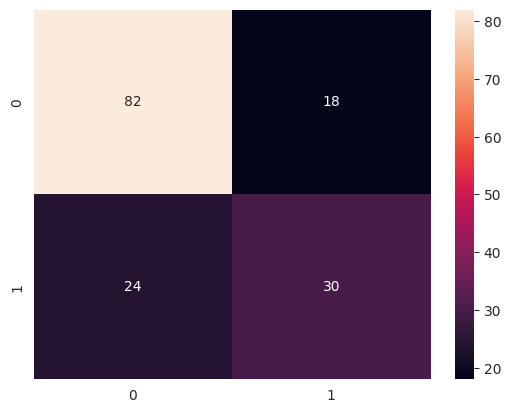

In [ ]:
# plotting counfusion metric for SVM
svm_cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_cm, annot=True)
plt.show()

In [ ]:
# 5) Naive-bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_test, y_test)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb, recall_nb, f1_nb, _ = precision_recall_fscore_support(y_test, y_pred_nb, average='weighted')
print(classification_report(y_test, y_pred_nb))

# Print the evaluation metrics
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

Accuracy: 0.7272727272727273
Precision: 0.7231468531468531
Recall: 0.7272727272727273
F1 Score: 0.724701768819416


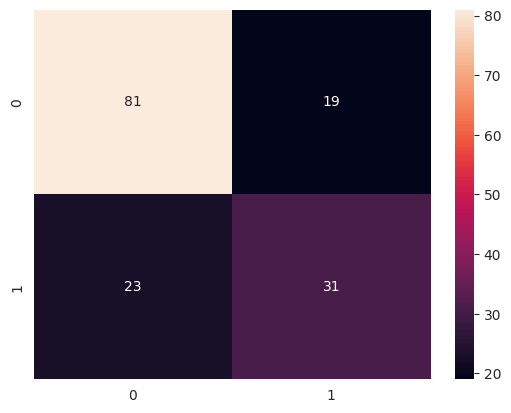

In [ ]:
# plotting counfusion metric
nb_cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(nb_cm, annot=True)
plt.show()

In [ ]:
# 6) AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit on training data
ada_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_ada = ada_model.predict(X_test_scaled)

# Evaluate
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada, recall_ada, f1_ada, _ = precision_recall_fscore_support(y_test, y_pred_ada, average='weighted')
print(classification_report(y_test, y_pred_ada))

print("Accuracy:", accuracy_ada)
print("Precision:", precision_ada)
print("Recall:", recall_ada)
print("F1 Score:", f1_ada)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Accuracy: 0.7337662337662337
Precision: 0.7289513207880556
Recall: 0.7337662337662337
F1 Score: 0.7305510023956626


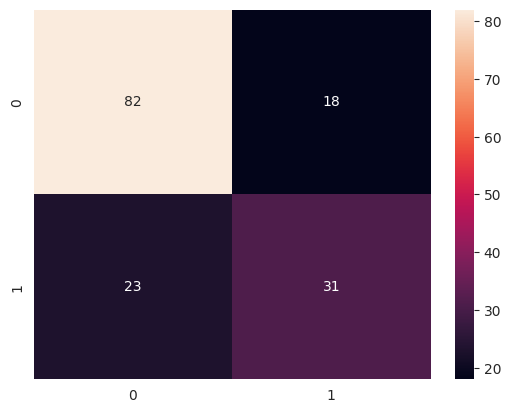

In [ ]:
# plotting confusion metric for AdaBoost
ada_cm = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(ada_cm, annot=True)
plt.show()

In [ ]:
# 7) Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit on training data
gb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb, recall_gb, f1_gb, _ = precision_recall_fscore_support(y_test, y_pred_gb, average='weighted')
print(classification_report(y_test, y_pred_gb))

print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

Accuracy: 0.7662337662337663
Precision: 0.7610055001359349
Recall: 0.7662337662337663
F1 Score: 0.7613786213786213


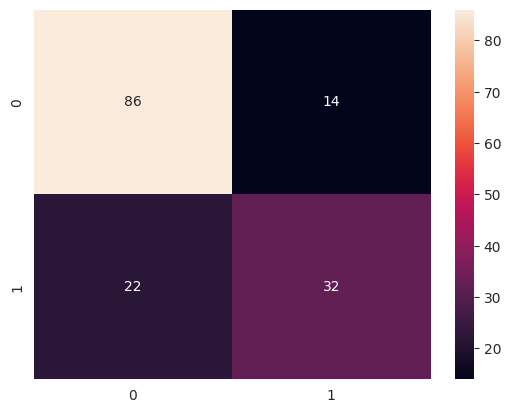

In [ ]:
# plotting confusion metric for Gradient Boosting
gb_cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(gb_cm, annot=True)
plt.show()

In [ ]:
 # Cross-Validation technique

In [ ]:
models = [('Logistic regression', lr_model), ('KNN', knn_model),
          ('Random Forest', rf_model), ('SVM', svm_model),
          ('Naive-bayes', nb_model), ('AdaBoost', ada_model),
          ('Gradient Boosting', gb_model)]

kfold = KFold(n_splits=7, shuffle=True, random_state=42)

for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    print(f"{name} score : ", scores.mean())

Logistic regression score :  0.7882706374085685
KNN score :  0.7427227944469325
Random Forest score :  0.7443088520674728
SVM score :  0.7768696820420958
Naive-bayes score :  0.7524630541871922
AdaBoost score :  0.7377966860725481
Gradient Boosting score :  0.7540864308105688


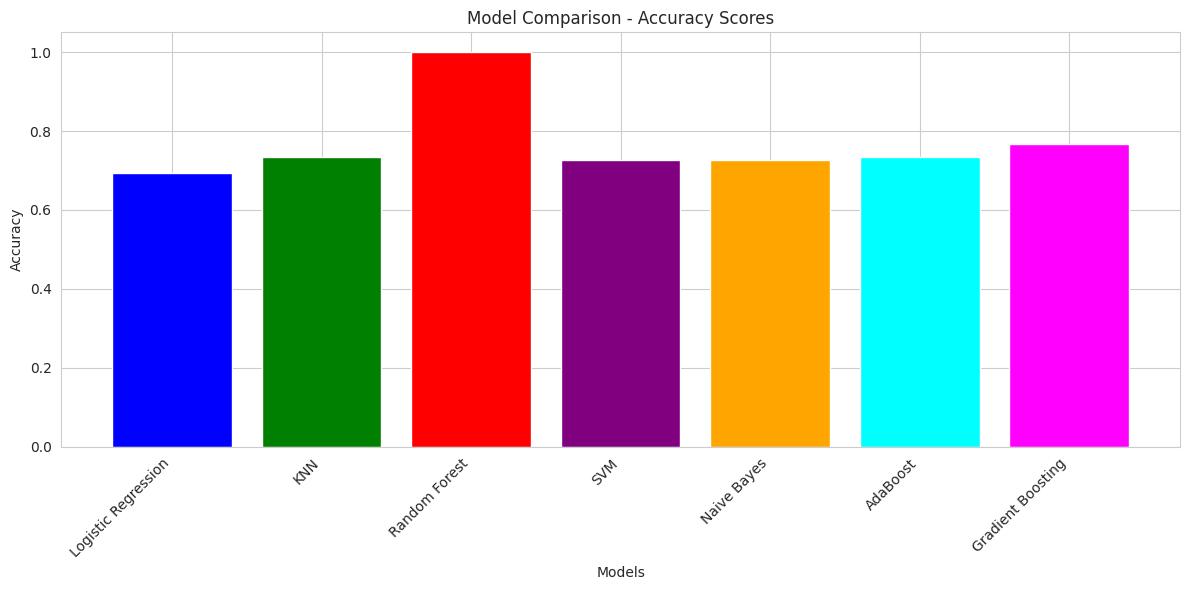

In [ ]:
import matplotlib.pyplot as plt

# Store model names and their corresponding scores
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes', 'AdaBoost', 'Gradient Boosting']
model_scores = [accuracy_lr, accuracy_knn, accuracy_rf, accuracy_svm, accuracy_nb, accuracy_ada, accuracy_gb]

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(model_names, model_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
models = [('Logistic regression', lr_model), ('KNN', knn_model),
          ('Random Forest', rf_model), ('SVM', svm_model),
          ('Naive-bayes', nb_model), ('AdaBoost', ada_model),
          ('Gradient Boosting', gb_model)]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models:
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append((name, cv_results))  # Store name and results

# Print results
for name, scores in results:
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Standard Deviation = {scores.std():.4f}")

Logistic regression: Mean Accuracy = 0.7883, Standard Deviation = 0.0330
KNN: Mean Accuracy = 0.7492, Standard Deviation = 0.0209
Random Forest: Mean Accuracy = 0.7508, Standard Deviation = 0.0214
SVM: Mean Accuracy = 0.7817, Standard Deviation = 0.0410
Naive-bayes: Mean Accuracy = 0.7557, Standard Deviation = 0.0469
AdaBoost: Mean Accuracy = 0.7475, Standard Deviation = 0.0412
Gradient Boosting: Mean Accuracy = 0.7589, Standard Deviation = 0.0286


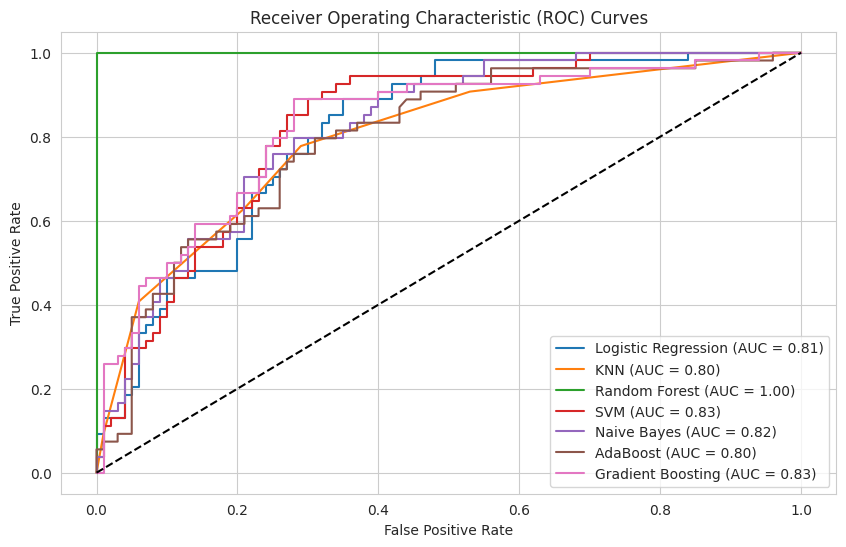

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have trained your models and have predictions for the test set

# Get predicted probabilities for each model
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_proba_svm = svm_model.decision_function(X_test)  # For SVM, use decision_function
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]
y_pred_proba_ada = ada_model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]


# Calculate ROC curve and AUC score for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)
auc_ada = roc_auc_score(y_test, y_pred_proba_ada)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
auc_gb = roc_auc_score(y_test, y_pred_proba_gb)




# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % auc_knn)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % auc_svm)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % auc_nb)
plt.plot(fpr_ada, tpr_ada, label='AdaBoost (AUC = %0.2f)' % auc_ada)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % auc_gb)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

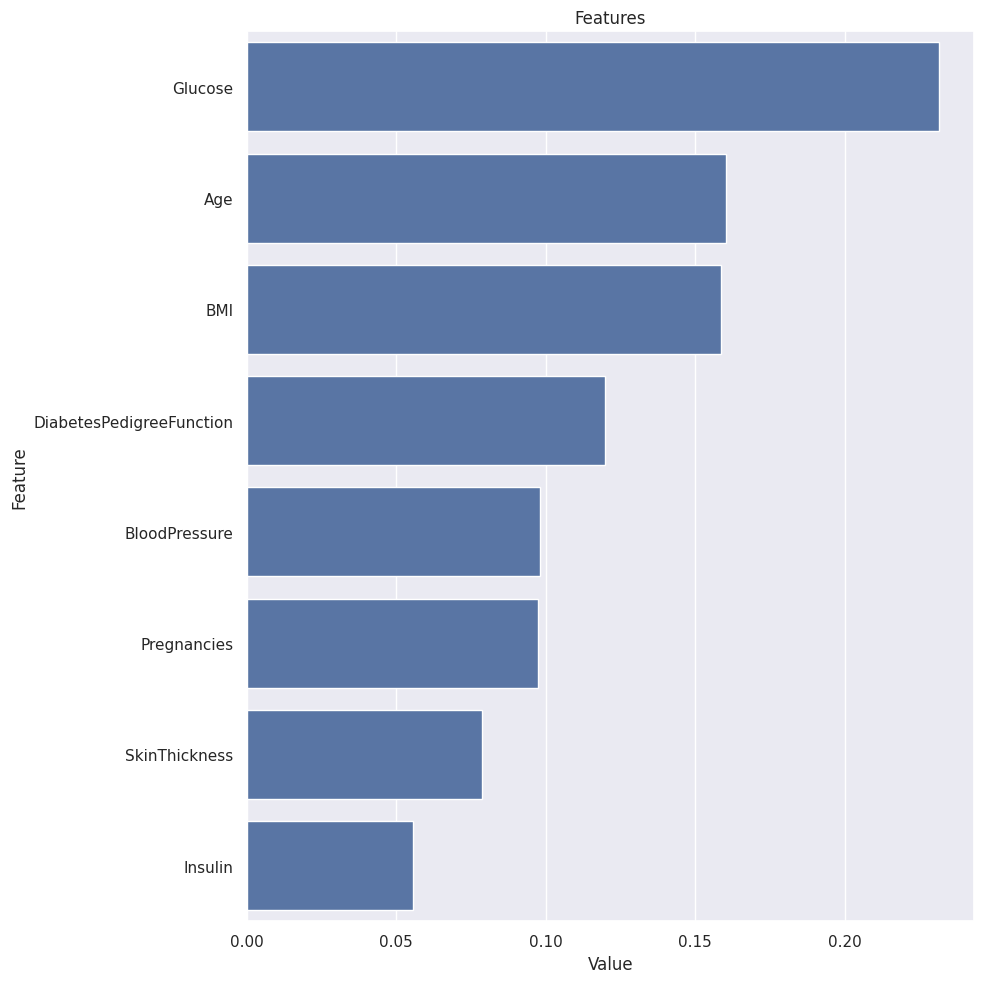

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    # print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances_result.png')

plot_importance(rf_model, X)

In [ ]:
metrics_data = {

    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_rf, accuracy_svm, accuracy_nb, accuracy_ada, accuracy_gb],
    'Precision': [precision_lr, precision_knn, precision_rf, precision_svm, precision_nb, precision_ada, precision_gb],
    'Recall': [recall_lr, recall_knn, recall_rf, recall_svm, recall_nb, recall_ada, recall_gb],
    'F1-Score': [f1_lr, f1_knn, f1_rf, f1_svm, f1_nb, f1_ada, f1_gb]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.694805   0.685142  0.694805  0.687504
1                  KNN  0.733766   0.734934  0.733766  0.734319
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3                  SVM  0.727273   0.721484  0.727273  0.723223
4          Naive Bayes  0.727273   0.723147  0.727273  0.724702
5             AdaBoost  0.733766   0.728951  0.733766  0.730551
6    Gradient Boosting  0.766234   0.761006  0.766234  0.761379
